In [ ]:
%pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 15.1 MB/s 
     |████████████████████████████████| 596 kB 41.2 MB/s 
     |████████████████████████████████| 101 kB 3.0 MB/s 
     |████████████████████████████████| 6.6 MB 56.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 154 µs (started: 2022-07-17 16:29:25 +00:00)


In [ ]:
import tensorflow as tf
import pandas as pd
import os

time: 1.16 ms (started: 2022-07-17 17:19:48 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.78 s (started: 2022-07-17 17:19:50 +00:00)


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/4-1_Semester/practice code/Sentiment Analysis/IMDB Dataset.csv')
dataset.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


time: 1.02 s (started: 2022-07-17 17:25:48 +00:00)


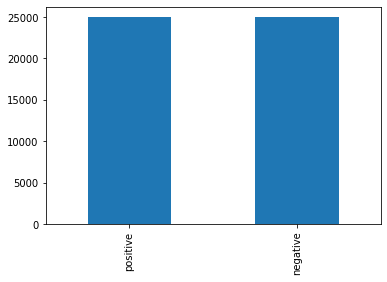

time: 113 ms (started: 2022-07-17 17:25:53 +00:00)


In [ ]:
dataset['sentiment'].value_counts()
%matplotlib inline
dataset['sentiment'].value_counts().plot(kind='bar')

In [ ]:
dataset.sentiment = dataset.sentiment.apply(lambda x: 0 if x =='negative' else 1)
dataset.sample()
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


time: 32.2 ms (started: 2022-07-17 17:25:58 +00:00)


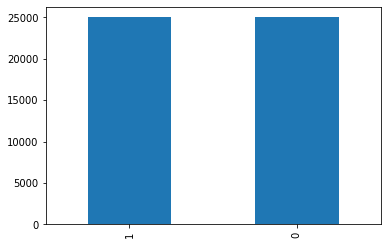

time: 105 ms (started: 2022-07-17 17:26:01 +00:00)


In [ ]:
%matplotlib inline
dataset['sentiment'].value_counts().plot(kind='bar')

In [ ]:
# # The shutil module offers a number of high-level 
# # operations on files and collections of files.
# import os
# import shutil
# # Create main directory path ("/aclImdb")
# main_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
# # Create sub directory path ("/aclImdb/train")
# train_dir = os.path.join(main_dir, 'train')
# # Remove unsup folder since this is a supervised learning task
# remove_dir = os.path.join(train_dir, 'unsup')
# shutil.rmtree(remove_dir)
# # View the final train folder
# print(os.listdir(train_dir))

time: 1.27 ms (started: 2022-07-17 16:51:26 +00:00)


In [ ]:
# We create a training dataset and a validation 
# dataset from our "aclImdb/train" directory with a 80/20 split.
# train = tf.keras.preprocessing.text_dataset_from_directory(
#     'aclImdb/train', batch_size=50000, validation_split=0.15, 
#     subset='training', seed=123)
# test = tf.keras.preprocessing.text_dataset_from_directory(
#     'aclImdb/train', batch_size=50000, validation_split=0.15, 
#     subset='validation', seed=123)

train = dataset[:35000]
test = dataset[35000:]

time: 2.49 ms (started: 2022-07-17 17:26:14 +00:00)


In [ ]:
# dataset = tf.data.Dataset.from_tensor_slices(dict(dataset))

# for i in train.take(1):
#   train_feat = i[0].numpy()
#   train_lab = i[1].numpy()

# train = pd.DataFrame([train_feat, train_lab]).T
# train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
# train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
# train.head()

AssertionError: ignored

time: 115 ms (started: 2022-07-17 17:26:23 +00:00)


In [ ]:
# for j in test.take(1):
#   test_feat = j[0].numpy()
#   test_lab = j[1].numpy()

# test = pd.DataFrame([test_feat, test_lab]).T
# test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
# test['DATA_COLUMN'] = test['DATA_COLUMN'].str.decode("utf-8")
# test.head()

,DATA_COLUMN,LABEL_COLUMN
0,I can't believe that so much talent can be was...,0
1,I'm not going to waste my time writing an essa...,0
2,When I go out to the video store to rent a fli...,0
3,This movie is a bad attempt to make original f...,0
4,I had to walk out of the theater. After an hou...,0


In [ ]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

time: 41 ms (started: 2022-07-17 17:28:34 +00:00)


In [ ]:

train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, 'review', 'sentiment')

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


time: 4min 47s (started: 2022-07-17 18:01:11 +00:00)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=1, validation_data=validation_data)

2188/2188 [==============================] - 2062s 932ms/step - loss: 0.2464 - accuracy: 0.8971 - val_loss: 0.3231 - val_accuracy: 0.8922


time: 34min 22s (started: 2022-07-17 18:10:35 +00:00)


In [ ]:
pred_sentences = ['This was a surprising movie. Totally not how I expected it to be like, I had low expectations from this and it aint what i thought it would be. ',
                  'Your time is better spent elsewhere. it is exactly how the trailer made it look like',
                  'worst movie of my life, will never watch movies from this series',
                  'I was going to say something awesome or great or good, but the movie was so bad',
                  'I loved this movie',
                  'The first half was so bad, but i loved the 2nd part']


time: 1.6 ms (started: 2022-07-17 18:51:06 +00:00)


In [ ]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

This was a surprising movie. Totally not how I expected it to be like, I had low expectations from this and it aint what i thought it would be.  : 
 Positive
Your time is better spent elsewhere. it is exactly how the trailer made it look like : 
 Negative
worst movie of my life, will never watch movies from this series : 
 Negative
I was going to say something awesome or great or good, but the movie was so bad : 
 Negative
I loved this movie : 
 Positive
The first half was so bad, but i loved the 2nd part : 
 Positive
time: 151 ms (started: 2022-07-17 18:51:08 +00:00)
